# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
from nltk import word_tokenize
import re
import nltk
import pickle
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from keras.layers import SimpleRNN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Import Data**

In [ ]:
dataset = pd.read_csv('labled_data.csv',encoding='mac_roman')
data = dataset[['VENDOR_NAME','LINE_DESCRIPTION','Category']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965907 entries, 0 to 965906
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VENDOR_NAME       965907 non-null  object
 1   LINE_DESCRIPTION  960741 non-null  object
 2   Category          911590 non-null  object
dtypes: object(3)
memory usage: 22.1+ MB


In [ ]:
#removing null records
data.dropna(inplace=True)
print(data.isna().sum())


VENDOR_NAME         0
LINE_DESCRIPTION    0
Category            0
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# **Separate Features from Labels**

In [ ]:
features = data[['VENDOR_NAME','LINE_DESCRIPTION']]
label = data[['Category']]


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2020-11-06 04:59:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-06 04:59:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-06 04:59:20--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences  
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split

In [ ]:
#ONE HOT ENCODING OF LABELS 
label['Category'] = label['Category'].astype('category')
label['Category'] = label['Category'].cat.codes
y = to_categorical(label['Category'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data.LINE_DESCRIPTION)
prep_data = tokenizer.texts_to_sequences(data.LINE_DESCRIPTION)
prep_data = pad_sequences(prep_data, maxlen=20)

# Print the shapes
print(prep_data.shape)
print(y.shape)


X_train,X_test,y_train,y_test = train_test_split(
                                                prep_data, y,  
                                                test_size=0.3,  
                                                random_state=1000)




(906863, 20)
(906863, 202)


**Note:**
Models are implemented using both classes and without classes. Due to execution time only code without classes was run and output is displayed. 

# **LSTM MODEL**

In [ ]:
class My_LSTM: 

  def __init__(self,vocabulary_size, wordvec_dim):
    self.vocabulary_size = vocabulary_size
    self.wordvec_dim = wordvec_dim
  
  def create_LSTM_model():
    vocabulary_size = 318618
    wordvec_dim = 300
    model = Sequential()
    model.add(Embedding(input_dim=vocabulary_size, output_dim=wordvec_dim, input_length=200))
    model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
    model.add(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
    model.add(Dense(16))
    model.add(Dense(202, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()

  def LSTM_fit(X_train, y_train,X_test, y_test,verbose):
    history = model.fit(X_train,y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=300)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print("Loss: {0} \nAccuracy: {1}".format(loss, acc))

In [ ]:
vocabulary_size = 318618
wordvec_dim = 300
My_LSTM(vocabulary_size,wordvec_dim)

In [ ]:
My_LSTM.create_LSTM_model()

In [ ]:
My_LSTM.LSTM_fit(X_train,y_train,X_test,y_test,0)

In [ ]:
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Embedding

vocabulary_size = 318618
wordvec_dim = 300

model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=wordvec_dim, input_length=200))
model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model.add(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
model.add(Dense(16))
model.add(Dense(202, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 300)          95585400  
_________________________________________________________________
lstm_4 (LSTM)                (None, 200, 64)           93440     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 202)               3434      
Total params: 95,716,338
Trainable params: 95,716,338
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=300)

Epoch 1/10
744/744 [==============================] - 980s 1s/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 2/10
744/744 [==============================] - 944s 1s/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 3/10
744/744 [==============================] - 948s 1s/step - loss: 6.4846e-04 - accuracy: 0.9998 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 4/10
744/744 [==============================] - 940s 1s/step - loss: 5.3625e-04 - accuracy: 0.9999 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 5/10
744/744 [==============================] - 944s 1s/step - loss: 4.4452e-04 - accuracy: 0.9999 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 6/10
744/744 [==============================] - 942s 1s/step - loss: 3.6613e-04 - accuracy: 0.9999 - val_loss: 0.0019 - val_accuracy: 0.9997
Epoch 7/10
744/744 [==============================] - 947s 1s/step - loss: 3.9554e-04 - accuracy: 0.9999 - val_loss: 0.0020 - 

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Loss: {0} \nAccuracy: {1}".format(loss, acc))

Loss: 0.002125105354934931 
Accuracy: 0.9996861219406128


# **RNN Model**

In [ ]:
class My_RNN: 

  def __init__(self,vocabulary_size, wordvec_dim):
    self.vocabulary_size = vocabulary_size
    self.wordvec_dim = wordvec_dim
  
  def create_RNN_model():
    vocabulary_size = 318618
    wordvec_dim = 300
    model_RNN = Sequential(name="emb_model")
    model_RNN.add(Embedding(input_dim=vocabulary_size, output_dim=wordvec_dim, input_length=200))
    model_RNN.add(SimpleRNN(units=128))
    model_RNN.add(Dense(202, activation='sigmoid'))
    model_RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  def RNN_fit(X_train, y_train,X_test, y_test,verbose):
    history_RNN = model_RNN.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=300)
    loss, acc = model_RNN.evaluate(X_test, y_test, verbose=0)
    print("Loss: {0} \nAccuracy: {1}".format(loss, acc))

In [ ]:
vocabulary_size = 318618
wordvec_dim = 300
My_RNN(vocabulary_size,wordvec_dim)

In [ ]:
My_RNN.create_RNN_model()

In [ ]:
My_RNN.RNN_fit(X_train, y_train,X_test, y_test,0)

In [ ]:
vocabulary_size = 318618
wordvec_dim = 300

model_RNN = Sequential(name="emb_model")
model_RNN.add(Embedding(input_dim=vocabulary_size, output_dim=wordvec_dim, input_length=200))
model_RNN.add(SimpleRNN(units=128))
model_RNN.add(Dense(202, activation='sigmoid'))
model_RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_RNN = model_RNN.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=300)

Epoch 1/10
744/744 [==============================] - 761s 1s/step - loss: 1.7868 - accuracy: 0.6260 - val_loss: 0.9548 - val_accuracy: 0.7935
Epoch 2/10
744/744 [==============================] - 758s 1s/step - loss: 0.7768 - accuracy: 0.8264 - val_loss: 0.7072 - val_accuracy: 0.8396
Epoch 3/10
744/744 [==============================] - 756s 1s/step - loss: 0.5989 - accuracy: 0.8607 - val_loss: 0.6211 - val_accuracy: 0.8553
Epoch 4/10
744/744 [==============================] - 756s 1s/step - loss: 0.5045 - accuracy: 0.8800 - val_loss: 0.5478 - val_accuracy: 0.8745
Epoch 5/10
744/744 [==============================] - 759s 1s/step - loss: 0.4376 - accuracy: 0.8946 - val_loss: 0.5162 - val_accuracy: 0.8810
Epoch 6/10
744/744 [==============================] - 757s 1s/step - loss: 0.3974 - accuracy: 0.9032 - val_loss: 0.5214 - val_accuracy: 0.8806
Epoch 7/10
744/744 [==============================] - 758s 1s/step - loss: 0.3607 - accuracy: 0.9109 - val_loss: 0.4870 - val_accuracy: 0.8888

In [ ]:
loss, acc = model_RNN.evaluate(X_test, y_test, verbose=0)
print("Loss: {0} \nAccuracy: {1}".format(loss, acc))

Loss: 0.4737358093261719 
Accuracy: 0.8945766091346741


# **CNN Model**

In [ ]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                                        vector, dtype=np.float32)[:embedding_dim]
                                        

    return embedding_matrix

In [ ]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('glove.6B.50d.txt' ,
                                            tokenizer.word_index,  
                                            embedding_dim)

In [ ]:
from keras.models import Sequential
from keras import layers
embedding_dim = 100
vocabulary_size = 318618
wordvec_dim = 300

model_CNN = Sequential()
model_CNN.add(layers.Embedding(vocabulary_size, embedding_dim, input_length=200))
model_CNN.add(layers.Conv1D(128, 5, activation='relu'))
model_CNN.add(layers.GlobalMaxPooling1D())
model_CNN.add(layers.Dense(10, activation='relu'))
model_CNN.add(layers.Dense(202, activation='sigmoid'))
model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_CNN.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    batch_size=100)

Epoch 1/5
2231/2231 [==============================] - 751s 337ms/step - loss: 1.3273 - accuracy: 0.6681 - val_loss: 0.7495 - val_accuracy: 0.8358
Epoch 2/5
2231/2231 [==============================] - 747s 335ms/step - loss: 0.6503 - accuracy: 0.8545 - val_loss: 0.6335 - val_accuracy: 0.8595
Epoch 3/5
2231/2231 [==============================] - 749s 336ms/step - loss: 0.5469 - accuracy: 0.8738 - val_loss: 0.5884 - val_accuracy: 0.8692
Epoch 4/5
2231/2231 [==============================] - 749s 336ms/step - loss: 0.4810 - accuracy: 0.8860 - val_loss: 0.5599 - val_accuracy: 0.8759
Epoch 5/5
2231/2231 [==============================] - 752s 337ms/step - loss: 0.4259 - accuracy: 0.8980 - val_loss: 0.5465 - val_accuracy: 0.8823


In [ ]:
loss, acc = model_CNN.evaluate(X_test, y_test, verbose=0)
print("Loss: {0} \nAccuracy: {1}".format(loss, acc))

Loss: 0.5465325117111206 
Accuracy: 0.8823258876800537


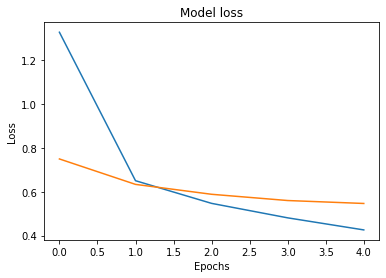

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

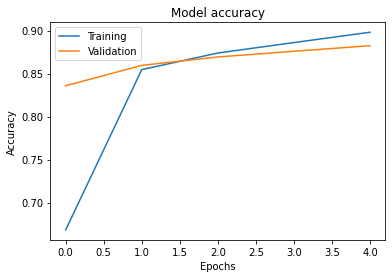

In [ ]:
# Plot accuracy values
plt.plot(history.history['accuracy'], label="Training")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# **MODEL COMPARISON**

|Model Name|Accuracy|
|---|---|
|CNN Model|88.23%|
|RNN Model|89.45%|
|Sequential Model with LSTM Layer|99%|
